In [1]:
import astropy.units as u
from specutils import Spectrum1D
from astrodb_utils.spectra import check_spectrum_plottable
import os
import numpy as np

In [2]:
files = ["/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1227m0447.txt",
         "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1411m4524.txt",
         "/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1614m8151.txt"]

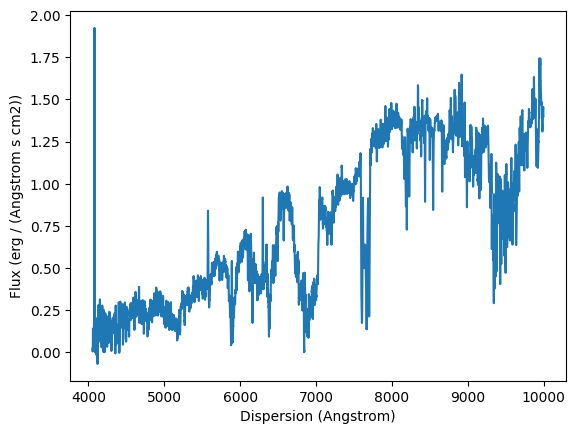

/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1227m0447.txt is plottable



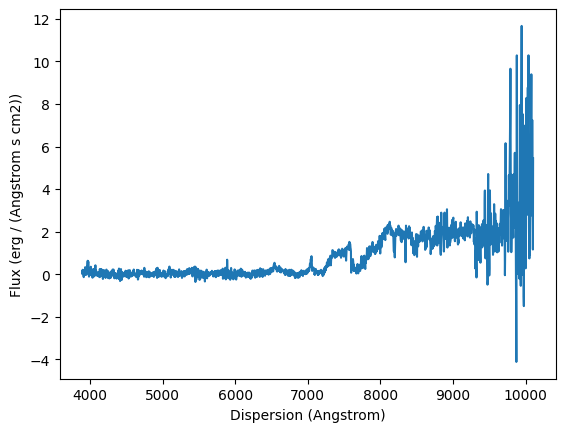

/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1411m4524.txt is plottable



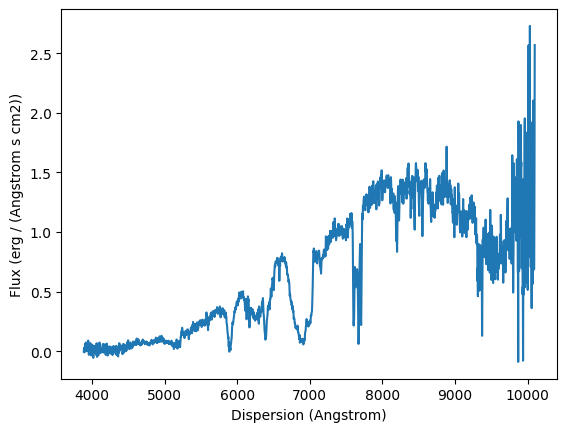

/Users/guanying/SIMPLE_Archive/SIMPLE-db/scripts/spectra_convert/BONES Archive/BONES SPECTRA/BCSpec_1614m8151.txt is plottable



In [3]:
"""  Process source with DSpec spectra
Read the data on two columns:
#1: wavelength      #2: flux
"""
for file in files:

    data = np.loadtxt(file, comments="#")

    wavelength = data[:, 0] * u.AA
    flux = data[:, 1] * (u.erg / u.cm**2 / u.s / u.AA)

    # Create a spectrum object
    spectrum = Spectrum1D(flux=flux, spectral_axis=wavelength)

    # Check if the spectrum is plottable
    if (check_spectrum_plottable(spectrum, show_plot=True)):
        print(f"{file} is plottable\n")
